#                                       CSE578 - Computer Vision

## Assignment - 1

### Name : Jeet Vora 
### Roll Number : 2019701006

Location of inputs and outputs: https://drive.google.com/open?id=1a5U7NDhditrk4IMLo9lGVG0jmc2t9Zlc

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
import math

# Direct Linear Transform

### Q1.  For the given image calib-object.jpg using any 20-30 diﬀerent points on diﬀerent planes and perform the Direct Linear Transform (DLT) based calibration as discussed in class. Report the projection matrix, camera matrix, rotation matrix and projection center. Note that you need to manually estimate the image co-ordinates of the given world points and refer to calib-object-legend.jpg for world measurements. Each chessblock is 28X28 mm

In [2]:
def datapoints():
    
    # Known 3D coordinates
    xyz = np.array([[28*1,28,0],[28*2,28,0],[28*3,28,0],[28*4,28,0],[28*5,28,0],[28*6,28,0],
                    [28*1,28*4,0],[28*3,28*4,0],[28*5,28*4,0],[28*1,28*8,0],[28*2,28*8,0],[28*3,28*8,0],
                    [28*4,28*8,0],[28*5,28*8,0],[28*6,28*8,0],[0,28,28*1],[0,28,28*2],[0,28,28*3],
                    [0,28,28*4],[0,28,28*5],[0,28,28*6],[0,28*4,28*1],[0,28*4,28*3],[0,28*4,28*5],[0,28*8,28*1],
                    [0,28*8,28*2],[0,28*8,28*3],[0,28*8,28*4],[0,28*8,28*5],[0,28*8,28*6],[0,28*5,0]])
    
    # Known pixel coordinates
    
    uv = np.array([[1660,1780],[1791,1802],[1931,1824],[2075,1850],[2232,1881],
                   [2407,1911],[1660,2278],[1913,2357],[2211,2453],[1656,2902],
                   [1778,2963],[1905,3020],[2040,3086],[2184,3156],[2342,3230],
                   [629,1903],[808,1872],[974,1846],[1136,1824],[1275,1798],[1407,1776],
                   [668,2492],[996,2392],[1289,2313],[707,3208],[869,3138],[1026,3073],
                   [1166,3011],[1297,2941],[1420,2902],[1538,2396]])
    '''
    xyz = np.array([[0, 0, 28],[0, 0, 84],[28, 0, 0],
                    [84, 0, 0],[28, 28, 0],[168, 28, 0],
                    [0, 0, 0],[56, 56, 0],[140, 0, 0],
                    [0, 28, 28],[0, 56, 56],[56, 0, 0],
                    [0, 0, 56],[28, 224, 0],[56, 224, 0],
                    [84, 224, 0],[0, 196, 84],[0, 168, 140],
                    [0, 140, 0],[196, 28, 0]])
    
    uv = np.array([[1409, 1606],[1134, 1640],[1662, 1610],
                   [1932, 1644],[1666, 1784],[2412, 1917],
                   [1545, 1591],[1789, 1983],[2245, 1685],
                   [1412, 1781],[1280, 1977],[1794, 1627],
                   [1279, 1623],[1658, 2903],[1777, 2960],
                   [1905, 3021],[1161, 2855],[857, 2802],
                   [1545, 2399],[2599, 1949]])'''
    
    #print(xyz.shape)
    #print(uv.shape)
    return xyz,uv
    
    
def DLT_Camera_Calibration(xyz,uv):
    A = []
    n = xyz.shape[0]
    nd = 3  # 3-dimension
    if (n < 6):
        raise ValueError('%dD DLT requires at least %d calibration points. Only %d points were entered.' %(nd, 2*nd, n))
        
    for i in range(n):
        x,y,z = xyz[i,0],xyz[i,1],xyz[i,2]
        u,v = uv[i,0],uv[i,1]
        A.append( [-x, -y, -z, -1, 0, 0, 0, 0, u * x, u * y, u * z, u] )
        A.append( [0, 0, 0, 0, -x, -y, -z, -1, v * x, v * y, v * z, v] )
    
    # Convert A to array
    A = np.asarray(A) 

    # Find the 11 parameters:
    U, S, V = np.linalg.svd(A)
    
    #print(U.shape,V.shape)
    # The parameters are in the last line of Vh and normalize them
    L = V[-1, :]
    # Camera projection matrix
    P = L.reshape(3, nd + 1)
    
    
    # Decomposition of P = KR[I|-X0] = KRI|-KRX0 = H|h
    H = P[:,:3] # H = KR
    h = P[:,3:] # h = -KRX0
    
    # Getting Projection Center X0 = -H^-1 h
    H_inv = np.linalg.inv(H)
    X_0=np.dot(-H_inv,h)
    
    
    # QR Decomposition of H^-1 gives Rotation matrix and K(Camera) matrix
    rot_inv, k_inv = np.linalg.qr(H_inv)
    R = rot_inv.T / rot_inv.T[-1,-1]
    
    k = np.linalg.inv(k_inv)
    K = k / k[-1,-1]
    
    w = np.array([0,0,0,1])
    w2 = np.dot(P,w)
    w_origin = np.array([w2[0]/w2[2],w2[1]/w2[2]])
    
    return P,X_0,K,R,w_origin

In [3]:
if __name__ == '__main__': 
  
    # Calling the function 
    xyz,uv = datapoints()
    P,X_0,K,R,w_origin = DLT_Camera_Calibration(xyz,uv)
    print("Projection Matrix(P) :\n",P)
    print("\nProjection Center(X0) :\n",X_0)
    print("\nCamera Matrix(K) :\n",K)
    print("\nRotation Matrix(R) :\n",R)  
    print('\nWorld Origin :',w_origin)

Projection Matrix(P) :
 [[-1.40689693e-04 -1.44393776e-03 -2.17928540e-03  5.39742432e-01]
 [-2.59567874e-03 -1.36328048e-03 -3.98302721e-03  8.41811522e-01]
 [-9.54314277e-07 -9.05916599e-07 -1.52125520e-06  3.92552002e-04]]

Projection Center(X0) :
 [[ 40.88078768]
 [188.32880256]
 [120.24852575]]

Camera Matrix(K) :
 [[ 4.95801086e+02 -2.55774506e+02  1.17598810e+03]
 [ 0.00000000e+00  4.61086664e+02  2.41528304e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Rotation Matrix(R) :
 [[-1.08757576 -0.10463999  0.7445721 ]
 [ 0.41449532 -1.17583215  0.44019377]
 [ 0.62732031  0.595506    1.        ]]

World Origin : [1374.95778556 2144.45861087]


### Q2. Implement the RANSAC based variant of the above calibration method and report your observations

In [4]:
def RANSAC(size,thr):
    xyz,uv = datapoints()
    idx = np.random.choice(range(len(xyz)),size = size,replace=False)
    notin_idx = []
    for i in range(xyz.shape[0]):
        if(np.all(i != idx)):
            notin_idx.append(i)
            
    # Camera Calibration        
    P,X_0,K,R,w_origin = DLT_Camera_Calibration(xyz[notin_idx],uv[notin_idx])
    
    # Calculation of 2d coordinates by given 3d coordinates and projection matrix
    XYZ = np.pad(xyz,((0,0),(0,1)),constant_values = 1)
    x = np.dot(P,XYZ[idx].T).T
    x_2d = np.array([x[:,0]/x[:,2], x[:,1]/x[:,2]]).T
    uvidx = uv[idx]
    
    
    # Calculating Reprojection Error
    first_element = (x_2d[:,0] - uvidx[:,0])**2
    second_element = (x_2d[:,1] - uvidx[:,1])**2
    #e = np.sqrt(first_element + second_element).mean()
    
    e = np.sqrt(first_element + second_element)
    err = e[np.where(e < thr)]
    inliners = err.shape[0]
   
    print('No. of inliners ',inliners,' Out of Total :',e.shape[0])
    err_sum = np.sum(err).mean()
    
    return err_sum,inliners,P
    
    #return e,P

In [5]:
if __name__ == '__main__': 
    n = 10
    size=20
    err = []
    P = []
    inliner = []
    for i in range(n):
     
        e,inliners,p = RANSAC(size,thr=700)
        if(inliners >= (size // 2)+2):
            err.append(e)
            P.append(p)
            inliner.append(inliners)
        '''
        e,p = RANSAC(size,thr=700)
        err.append(e)
        P.append(p)
        '''
    # finding minimum error and its corresponding projection matrix
    min_err_idx = np.argmin(err)
    print('Minimum Error :\n',err[min_err_idx])
    print('\nProjection Matrix for minimum error: \n',P[min_err_idx])
    print('\nNo. of inliners: \n',inliner[min_err_idx])

No. of inliners  7  Out of Total : 20
No. of inliners  16  Out of Total : 20
No. of inliners  11  Out of Total : 20
No. of inliners  12  Out of Total : 20
No. of inliners  5  Out of Total : 20
No. of inliners  15  Out of Total : 20
No. of inliners  15  Out of Total : 20
No. of inliners  13  Out of Total : 20
No. of inliners  18  Out of Total : 20
No. of inliners  9  Out of Total : 20
Minimum Error :
 3642.0173486384815

Projection Matrix for minimum error: 
 [[ 8.23997998e-04 -1.47001264e-03 -2.57657956e-03  6.77569917e-01]
 [-6.18191266e-04  1.10722897e-04 -2.54118993e-03  7.35447144e-01]
 [-3.96521995e-07 -6.79111545e-07 -1.29016266e-06  4.18740612e-04]]

No. of inliners: 
 15


The input to the RANSAC algorithm is a set of observed data values, a way of fitting some kind of model to the observations. RANSAC achieves its goal by repeating the following steps:

1. Select a random subset of the original data. Call this subset the hypothetical inliers.
2. A model is fitted to the set of hypothetical inliers.
3. All other data are then tested against the fitted model. Those points that fit the estimated model well, according to some model-specific loss function, are considered as part of the consensus set.
4. The estimated model is reasonably good if sufficiently many points have been classified as part of the consensus set.
5. Afterwards, the model may be improved by reestimating it using all members of the consensus set.

The minimum reprojection error which is generated by estimating the parameters using RANSAC can be said as the best Camera Calibration for that particular points. 

### Q3. Repeat the above experiments after correcting for radial distortion. Estimate the radial distortion parameters from the straight lines in the image. What do you observe regarding the resulting parameters

In [6]:
def Radial_Distortion(img):
    uv = np.array([[1595,  37],[ 504, 196],[1169, 141],
                   [1758, 262],[ 655, 336],[1290, 344],
                   [ 796, 475],[1428, 563],[ 366, 767],
                   [ 924, 599],[1567, 778],[  71,1590],
                   [ 659,1343],[1039,1222],[1550,1486],
                   [ 220,1365],[ 792,1118],[1413,1228],
                   [ 198,1002],[ 797, 799],[1154, 810],
                   [1715,1008]])

    xyz = np.array([[126,  14,   0,   1],[  0,  42,  98,   1],[ 42,  42,   0,   1],
                    [154,  42,   0,   1],[  0,  70,  70,   1],[ 70,  70,   0,   1],
                    [  0,  98,  42,   1],[ 98,  98,   0,   1],[  0, 126, 126,   1],
                    [  0, 126,  14,   1],[126, 126,   0,   1],[  0, 238, 182,   1],
                    [  0, 238,  70,   1],[ 14, 238,   0,   1],[126, 238,   0,   1],
                    [  0, 210, 154,   1],[  0, 210,  42,   1],[ 98, 210,   0,   1],
                    [  0, 154, 154,   1],[  0, 154,  42,   1],[ 42, 154,   0,   1],
                    [154, 154,   0,   1]])

    
    P,X_0,K,R,w_origin = DLT_Camera_Calibration(xyz,uv)
    
   
    
    np.random.shuffle(uv)
    arr=[]
    mat_r=[]
    for i in range(len(uv)):
        if(i+1 < len(uv)):
            arr = np.append(arr,[(uv[i,0]/uv[i+1,0])-1,(uv[i,1]/uv[i+1,1])-1]) 
            r = np.sqrt((uv[i,0])**2 + (uv[i,1])**2)
            mat_r = np.append(mat_r,[[r,r**2],[r,r**2]])
     
    # arr = mat_r.k
    # We want to find k coefficients, So using QR decomposition to solve this equation.
    mat_r = mat_r.reshape(len(mat_r)//2,2)
    q,r = np.linalg.qr(mat_r)
    b = np.dot(q.T,arr)
    # Calculating coefficients k1,k2
    k = np.linalg.solve(r,b)

    dist_coef = np.array([k[0],k[1],0,0])
    
    # Using undistort function with image, camera_matrix and k_coefficients as input
    dst = cv.undistort(img, K, np.float32(dist_coef))
    f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20))
    ax1.imshow(img)
    ax1.set_title('Original Image')
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image')

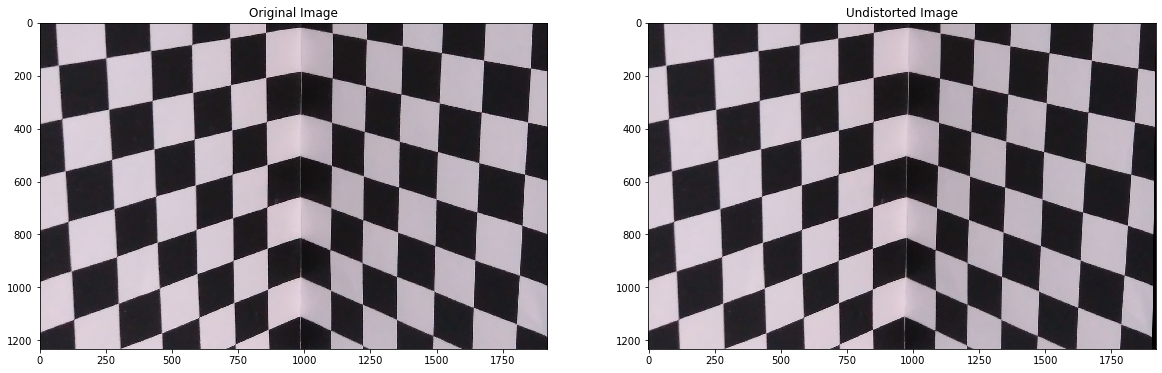

In [7]:
if __name__ == '__main__': 
    img = cv.imread('input_data/Fig1.png')
    Radial_Distortion(img)

Due to radial distortion, straight lines will appear curved. Its effect is more as we move away from the center of image. 
This distortion is solved as follows:
<img src="input_data/1.png">

# Zhang's Method

### Q.1 Use checkerboard images IMG5456.JPG - IMG5470.JPG and perform camera calibration using Zhang’s Method. You can use the available OpenCV or Matlab implementation

In [8]:
def Zhangs_Method(images,m,n):
    # termination criteria
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((m*n,3), np.float32)
    objp[:,:2] = np.mgrid[0:m,0:n].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d point in real world space
    imgpoints = [] # 2d points in image plane.

    for fname in images:
        img = cv.imread(fname)
        gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

        # Find the chess board corners
        ret, corners = cv.findChessboardCorners(gray, (m,n),None)

        # If found, add object points, image points (after refining them)
        if ret == True:
            objpoints.append(objp) #append 3D points which are always the same

            corners2 = cv.cornerSubPix(gray,corners,(12,12),(-1,-1),criteria) 
            imgpoints.append(corners2) #append current 2D points

            '''
            # Draw and display the corners
            img = cv.drawChessboardCorners(img, (8,6), corners2,ret)
            cv.imshow('img',img)
            cv.waitKey(0)
       
    cv.destroyAllWindows()
    '''
    #print(objpoints)
    ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None) 
    return ret, mtx, dist, rvecs, tvecs, objpoints

In [9]:
if __name__ == '__main__':
    images = glob.glob('input_data/IMG_*.jpg')
    # intersection points in chessboard 'm' rows and 'n' cols
    ret, mtx, dist, rvecs, tvecs, objpoints = Zhangs_Method(images,m=8,n=6)
    print('Reprojection Error:', ret)
    print ('Camera Calibration Matrix:')
    print(mtx)
    print('Distortion Parameters:')
    print(dist)
    print('Rotation Vectors for the images are:')
    print(rvecs)
    print('Translation Vectors for the images are:')
    print(tvecs)

Reprojection Error: 8.277384695983425
Camera Calibration Matrix:
[[1.23475172e+04 0.00000000e+00 2.43203902e+03]
 [0.00000000e+00 1.24706157e+04 2.38886482e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Parameters:
[[ 1.26178530e-01  2.80123210e+00  1.53868956e-02 -4.54928581e-03
  -3.77449265e+01]]
Rotation Vectors for the images are:
[array([[0.51288707],
       [0.0473495 ],
       [0.00766483]]), array([[ 0.00917521],
       [-0.00597144],
       [-0.00308977]]), array([[0.06717445],
       [0.26616279],
       [0.04406502]]), array([[ 0.04833888],
       [-0.33298815],
       [-0.04850948]]), array([[ 0.07589888],
       [-0.53767308],
       [-0.09850122]]), array([[0.0804038 ],
       [0.35324677],
       [0.07674795]]), array([[-0.27128147],
       [-0.15374366],
       [-0.01264681]]), array([[-0.13614237],
       [-0.30523546],
       [-0.01022002]]), array([[ 0.31600144],
       [-0.24514902],
       [ 0.00709113]]), array([[0.39057285],
       [0.12737384]

### Q2. Using the estimated camera parameters compute the image points and overlay a wireframe over the actual image of chessboard using straight lines between the computed points. Refer to example-wireframe.png for reference. What do you observe about the overlay? Note that do not use the image points found using the cvFindChessboardCorners for wireframe overlay. Size of each square on checkerboard 29mmX29mm

### Q3. What is the image of the world origin, given the calibration matrix? Does this result bear out in your observations

In [10]:
# Function to convert the Rotation Matrix into the Euler Angles
def eulerAnglesToRotationMatrix(theta) :
    R_x = np.array([[1,0,0],[0,math.cos(theta[0]),-math.sin(theta[0])],[0,math.sin(theta[0]), math.cos(theta[0])]])
    R_y = np.array([[math.cos(theta[1]),0,math.sin(theta[1])],[0,1,0],[-math.sin(theta[1]),0,math.cos(theta[1])]])             
    R_z = np.array([[math.cos(theta[2]),-math.sin(theta[2]),0],[math.sin(theta[2]),math.cos(theta[2]),0],[0,0,1]])
    R = np.dot(R_z,np.dot(R_y,R_x))
    return R

def plot_wireframe(image_corners, plotter, color='green'):
    for i in range(0,14):
        plotter.plot([image_corners[2*i][0],image_corners[2*i+1][0]],[image_corners[2*i][1],image_corners[2*i+1][1]], linewidth=4, color = color) 
    return


def Wireframe(img, ret, mtx, dist, rvecs, tvecs, objpoints, m, n):
    objpoint = np.ones((m*n,4), np.float32)
    objpoint = np.zeros((m*n,3), np.float32)
    objp = objpoint
    objpoint[:,:2] = np.mgrid[0:m,0:n].T.reshape(-1,2)
    objp = np.array([[0,0,0],[7,0,0],[0,1,0],
                     [7,1,0],[0,2,0],[7,2,0],
                     [0,3,0],[7,3,0],[0,4,0],
                     [7,4,0],[0,5,0],[7,5,0],
                     [0,0,0],[0,5,0],[1,0,0],
                     [1,5,0],[2,0,0],[2,5,0],
                     [3,0,0],[3,5,0],[4,0,0],
                     [4,5,0],[5,0,0],[5,5,0],
                     [6,0,0],[6,5,0],[7,0,0],[7,5,0]])
    objp = np.pad(objp,((0,0),(0,1)),constant_values = 1)
   
    #print(objp)
    
    R = (eulerAnglesToRotationMatrix(rvecs[0]))
    temp1 = np.zeros((3,4))
    temp1[0:3,0:3] = R[0:3,0:3]
    temp1[:,3] = tvecs[0][:,0]
    P = np.matmul(mtx,temp1)
    P = P/P[2,3]

    projected_points = []
   
    for i in range(28):
        projection = np.matmul(P,objp[i,:])
        projection = projection/projection[2]
        projected_points.append(projection[0:2])
    projected_points = np.asarray(projected_points)
     
    plot_wireframe(projected_points, plt, color='red')
    
    projections, _ = cv.projectPoints(objpoint, rvecs[0], tvecs[0], mtx, dist, projected_points)
    projections = np.asarray(projections)
    plt.plot(projections[:,:,0],projections[:,:,1],'ro',markersize = 10)
    plt.plot(projections[0,0,0],projections[0,0,1],'go',markersize = 10)
    
    plt.imshow(img.astype('uint8'))
    plt.title('Wireframe from reprojected points')
    plt.show() 
    

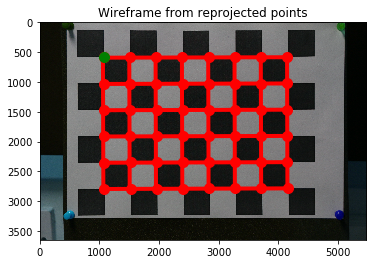

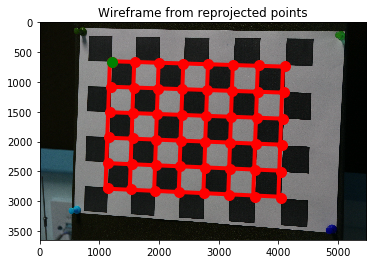

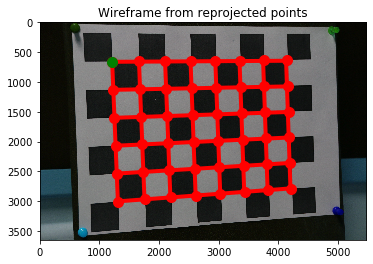

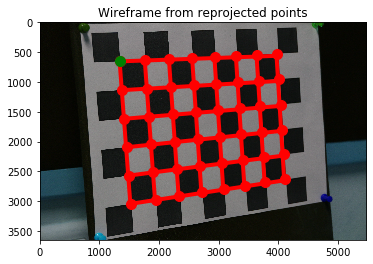

In [11]:
if __name__ == '__main__': 
    m, n = 8, 6 # intersection points in chessboard 'm' rows and 'n' cols 
    images = glob.glob('input_data/IMG_5456.jpg')
    img = cv.imread(images[0])
    ret, mtx, dist, rvecs, tvecs, objpoints = Zhangs_Method(images,m,n)
    projections = Wireframe(img, ret, mtx, dist, rvecs, tvecs, objpoints,m,n)
    
    images = glob.glob('input_data/IMG_5457.jpg')
    img = cv.imread(images[0])
    ret, mtx, dist, rvecs, tvecs, objpoints = Zhangs_Method(images,m,n)
    projections = Wireframe(img, ret, mtx, dist, rvecs, tvecs, objpoints,m,n)
    
    images = glob.glob('input_data/IMG_5458.jpg')
    img = cv.imread(images[0])
    ret, mtx, dist, rvecs, tvecs, objpoints = Zhangs_Method(images,m,n)
    projections = Wireframe(img, ret, mtx, dist, rvecs, tvecs, objpoints,m,n)
    
    images = glob.glob('input_data/IMG_5459.jpg')
    img = cv.imread(images[0])
    ret, mtx, dist, rvecs, tvecs, objpoints = Zhangs_Method(images,m,n)
    projections = Wireframe(img, ret, mtx, dist, rvecs, tvecs, objpoints,m,n)

The world origin is shown in above images as green point. Yes based on that origin we have calculated each and every intersection points which is 8*6 = 48 points according to the above images

# Hands on

### 1. Perform the above calibration methods using the images taken by your camera. Use the calibration object for which you can measure the world co-ordinates for DLT and printed checkerboard pattern for Zhangs Method.
### 2. Vary the focus of your phone and comment on the results

Projection Matrix(P) :
 [[-6.41834565e-01  8.82861535e-02 -1.17946077e-01 -8.92499546e-02]
 [-1.20809068e-01  6.72353212e-01  1.86272406e-01 -2.38801152e-01]
 [-1.07653784e-04  5.16550389e-05  1.51593801e-04 -6.40883144e-05]]

Projection Center(X0) :
 [[-0.14469746]
 [ 0.26558844]
 [ 0.22950875]]

Camera Matrix(K) :
 [[ 3.06625082e+03 -9.97968154e+00  1.49782640e+03]
 [-0.00000000e+00 -3.04973630e+03  2.04020610e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Rotation Matrix(R) :
 [[-1.03460802  0.01949248 -0.7413651 ]
 [-0.21376233 -1.22634737  0.26607089]
 [-0.71014635  0.34074638  1.        ]]

World Origin : [1392.60886307 3726.12628008]


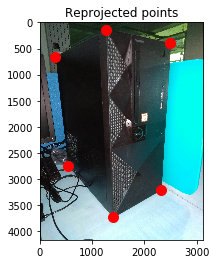

In [12]:
if __name__ == '__main__':
    xyz = np.array([[0,0,0,1],[0.15,0,0,1],[0,0.345,0,1],[0.15,0.345,0,1],[0,0,-0.275,1],[0,0.345,-0.275,1]])
    uv = np.array([[1396,3726],[2311,3202],[1266,148],[2486,400],[536,2742],[301,660]])
    P,X_0,K,R,w_origin = DLT_Camera_Calibration(xyz,uv)
    print("Projection Matrix(P) :\n",P)
    print("\nProjection Center(X0) :\n",X_0)
    print("\nCamera Matrix(K) :\n",K)
    print("\nRotation Matrix(R) :\n",R)  
    print('\nWorld Origin :',w_origin)
    
    projected_points = []
    for i in range(xyz.shape[0]):
        projection = np.matmul(P,xyz[i,:])
        projection = projection/projection[2]
        projected_points.append(projection[0:2])
    projected_points = np.asarray(projected_points)
    
    img = cv.imread('input_data/fig2.jpg')
    plt.plot(projected_points[:,0],projected_points[:,1],'ro',markersize = 10)
    plt.imshow(img.astype('uint8'))
    plt.title('Reprojected points')
    plt.show() 

In [13]:
if __name__ == '__main__':
    images = glob.glob('input_data/img_*.jpg')
    # intersection points in chessboard 'm' rows and 'n' cols
    ret, mtx, dist, rvecs, tvecs, objpoints = Zhangs_Method(images,m=8,n=6)
    print('Reprojection Error:', ret)
    print ('Camera Calibration Matrix:')
    print(mtx)
    print('Distortion Parameters:')
    print(dist)
    print('Rotation Vectors for the images are:')
    print(rvecs)
    print('Translation Vectors for the images are:')
    print(tvecs)

Reprojection Error: 8.277384695983425
Camera Calibration Matrix:
[[1.23475172e+04 0.00000000e+00 2.43203902e+03]
 [0.00000000e+00 1.24706157e+04 2.38886482e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Parameters:
[[ 1.26178530e-01  2.80123210e+00  1.53868956e-02 -4.54928581e-03
  -3.77449265e+01]]
Rotation Vectors for the images are:
[array([[0.51288707],
       [0.0473495 ],
       [0.00766483]]), array([[ 0.00917521],
       [-0.00597144],
       [-0.00308977]]), array([[0.06717445],
       [0.26616279],
       [0.04406502]]), array([[ 0.04833888],
       [-0.33298815],
       [-0.04850948]]), array([[ 0.07589888],
       [-0.53767308],
       [-0.09850122]]), array([[0.0804038 ],
       [0.35324677],
       [0.07674795]]), array([[-0.27128147],
       [-0.15374366],
       [-0.01264681]]), array([[-0.13614237],
       [-0.30523546],
       [-0.01022002]]), array([[ 0.31600144],
       [-0.24514902],
       [ 0.00709113]]), array([[0.39057285],
       [0.12737384]

In [14]:
def Wireframe_handson(img, ret, mtx, dist, rvecs, tvecs, objpoints, m, n):
    objpoint = np.ones((m*n,4), np.float32)
    objpoint = np.zeros((m*n,3), np.float32)
    objp = objpoint
    objpoint[:,:2] = np.mgrid[0:m,0:n].T.reshape(-1,2)
    objp = np.array([[0,0,0],[8,0,0],[0,1,0],
                     [8,1,0],[0,2,0],[8,2,0],
                     [0,3,0],[8,3,0],[0,4,0],
                     [8,4,0],[0,5,0],[8,5,0],
                     [0,0,0],[0,5,0],[1,0,0],
                     [1,5,0],[2,0,0],[2,5,0],
                     [3,0,0],[3,5,0],[4,0,0],
                     [4,5,0],[5,0,0],[5,5,0],
                     [6,0,0],[6,5,0],[7,0,0],
                     [7,5,0],[8,0,0],[8,5,0]])
    objp = np.pad(objp,((0,0),(0,1)),constant_values = 1)
   
    #print(objp)
    
    R = (eulerAnglesToRotationMatrix(rvecs[0]))
    temp1 = np.zeros((3,4))
    temp1[0:3,0:3] = R[0:3,0:3]
    temp1[:,3] = tvecs[0][:,0]
    P = np.matmul(mtx,temp1)
    P = P/P[2,3]

    projected_points = []
   
    for i in range(30):
        projection = np.matmul(P,objp[i,:])
        projection = projection/projection[2]
        projected_points.append(projection[0:2])
    projected_points = np.asarray(projected_points)
     
    #plot_wireframe(projected_points, plt, color='red')
    
    projections, _ = cv.projectPoints(objpoint, rvecs[0], tvecs[0], mtx, dist, projected_points)
    projections = np.asarray(projections)
    plt.plot(projections[:,:,0],projections[:,:,1],'ro',markersize = 10)
    plt.plot(projections[0,0,0],projections[0,0,1],'go',markersize = 10)
    
    plt.imshow(img.astype('uint8'))
    plt.title('Wireframe from reprojected points')
    plt.show() 

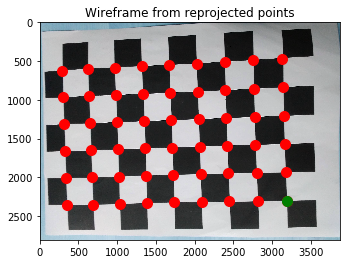

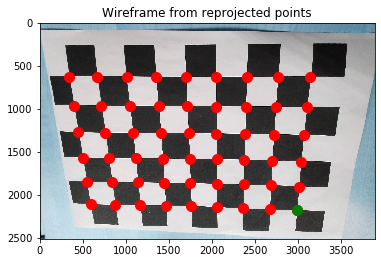

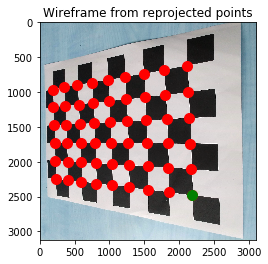

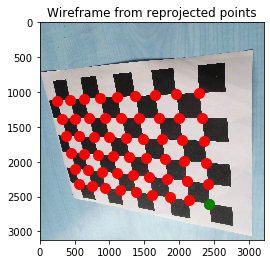

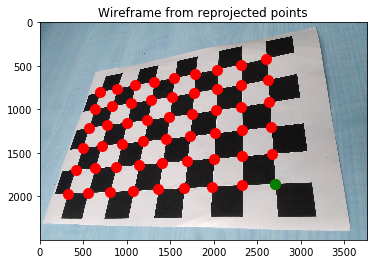

In [15]:
if __name__ == '__main__': 
    m, n = 9, 6 # intersection points in chessboard 'm' rows and 'n' cols 
    images = glob.glob('input_data/img_1.jpg')
    img = cv.imread(images[0])
    ret, mtx, dist, rvecs, tvecs, objpoints = Zhangs_Method(images,m,n)
    projections = Wireframe_handson(img, ret, mtx, dist, rvecs, tvecs, objpoints,m,n)
    
    images = glob.glob('input_data/img_3.jpg')
    img = cv.imread(images[0])
    ret, mtx, dist, rvecs, tvecs, objpoints = Zhangs_Method(images,m,n)
    projections = Wireframe_handson(img, ret, mtx, dist, rvecs, tvecs, objpoints,m,n)
    
    images = glob.glob('input_data/img_4.jpg')
    img = cv.imread(images[0])
    ret, mtx, dist, rvecs, tvecs, objpoints = Zhangs_Method(images,m,n)
    projections = Wireframe_handson(img, ret, mtx, dist, rvecs, tvecs, objpoints,m,n)
    
    images = glob.glob('input_data/img_5.jpg')
    img = cv.imread(images[0])
    ret, mtx, dist, rvecs, tvecs, objpoints = Zhangs_Method(images,m,n)
    projections = Wireframe_handson(img, ret, mtx, dist, rvecs, tvecs, objpoints,m,n)
    
    images = glob.glob('input_data/img_6.jpg')
    img = cv.imread(images[0])
    ret, mtx, dist, rvecs, tvecs, objpoints = Zhangs_Method(images,m,n)
    projections = Wireframe_handson(img, ret, mtx, dist, rvecs, tvecs, objpoints,m,n)
    

After varying the focus of the camera, the Projection and Camera Matrix will change and Rotation and translation vectors will not change.